In [1]:
import math
import eikon as ek  # the Eikon Python wrapper package
ek.set_app_key('0ed6a35e0937415eab446d3375bca7cf671d6b4c')
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
import scipy.optimize as sco  # optimization routines
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [9]:
import os
path = os.getcwd()
import datetime as dt 
Today = dt.datetime.today()

In [3]:
path

'c:\\Users\\KOSUKE\\VScode\\vaccination'

In [4]:
cf.set_config_file(offline=True, theme="white")
#Font Setting
from matplotlib.font_manager import FontProperties
import sys
if sys.platform.startswith('win'):
    FontPath= 'C:\\Windows\\Fonts\\meiryo.ttc'
elif sys.platform.startswith('darwin'):
    FontPath= '/System/Library/Fonts/ヒラノギ角ゴシック W4.ttc'
elif sys.platform.startswith('linux'):
    FontPath= '/usr/share/fonts/truetype/takao-gothic/TakaoExGothic.ttc'
jpfont = FontProperties(fname = FontPath)

In [5]:
df_US_vaccination = pd.read_csv(str(path)+'\\us-daily-covid-vaccine-doses-administered.csv')
sdi

In [17]:
KijunDate = Today - dt.timedelta(1)
KijunDate
KijunDate.date()

datetime.date(2021, 5, 26)

In [29]:
KijunDate

Timestamp('2021-05-26 00:00:00')

KijunDate = pd.Timestamp(KijunDate.date().year,KijunDate.date().month,KijunDate.date().day)

In [35]:
pd.to_datetime(df_US_vaccination['Day'])

0      2021-01-13
1      2021-01-14
2      2021-01-15
3      2021-01-16
4      2021-01-17
          ...    
8728   2021-05-22
8729   2021-05-23
8730   2021-05-24
8731   2021-05-25
8732   2021-05-26
Name: Day, Length: 8733, dtype: datetime64[ns]

In [37]:
df_US_vaccination['Day'] = pd.to_datetime(df_US_vaccination['Day'])

In [39]:
df_kijundate = df_US_vaccination[df_US_vaccination['Day']==KijunDate]


In [48]:
df_kijundate[['Entity','daily_vaccinations']].set_index('Entity').iplot(kind='bar')

In [68]:
#合計を求める
df_Cumsum = df_US_vaccination.pivot_table(values='daily_vaccinations',index='Entity',aggfunc='sum')


In [69]:
df_Cumsum =df_Cumsum.sort_values(by='daily_vaccinations',ascending=False)

In [70]:
df_Cumsum

,daily_vaccinations
Entity,
United States,284782136
California,36318880
Texas,21443267
New York State,18397215
Florida,17675988
...,...
Northern Mariana Islands,44035
Federated States of Micronesia,41461
American Samoa,41137


In [71]:
df_Cumsum.iplot(kind='bar')

In [77]:
df_total_vaccination = pd.read_csv(str(path)+'\\us-state-covid-vaccines-per-100.csv')



In [78]:
df_total_vaccination['Day'] = pd.to_datetime(df_total_vaccination['Day'])
df_kijundate = df_total_vaccination[df_total_vaccination['Day']==KijunDate]
df_March = df_total_vaccination[df_total_vaccination['Day']=='2021/3/1']

In [86]:
df_kijundate = df_kijundate[['Entity','total_vaccinations_per_hundred']].set_index('Entity')

In [87]:
df_kijundate.iplot(kind='bar')
df_kijundate

In [93]:
df_kijundate.sort_values(by='total_vaccinations_per_hundred',ascending=False).iplot(kind='bar')ah

In [95]:
df_kijundate.sort_values(by='total_vaccinations_per_hundred',ascending=False).to_excel(str(path)+'\\0526USstate.xlsx')

In [91]:
df_sp = df_total_vaccination[df_total_vaccination['Day']=='2021/4/1']
df_sp = df_sp[['Entity','total_vaccinations_per_hundred']].set_index('Entity')
df_sp.iplot(kind='bar')

In [96]:
df_world_vaccination = pd.read_csv(str(path)+'\\owid-covid-data.csv')

In [106]:
df[df['location']=='United States']

,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,...,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population
86509,United States,2020/1/22,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0
86510,United States,2020/1/23,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0
86511,United States,2020/1/24,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0
86512,United States,2020/1/25,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0
86513,United States,2020/1/26,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,331002647.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86994,United States,2021/5/21,33085106.0,28341.0,27133.857,589223.0,603.0,545.143,99954.204,85.622,...,161278336.0,127778250.0,2198101.0,1879526.0,84.20,48.22,38.21,5620.0,52.31,331002647.0
86995,United States,2021/5/22,33104884.0,19778.0,25843.143,589703.0,480.0,545.571,100013.955,59.752,...,162470794.0,129006463.0,2345872.0,1872697.0,84.90,48.58,38.57,5599.0,52.31,331002647.0
86996,United States,2021/5/23,33117737.0,12853.0,25270.143,589893.0,190.0,535.143,100052.786,38.831,...,163309414.0,130014175.0,1779363.0,1827882.0,85.43,48.83,38.87,5465.0,NaN,331002647.0
86997,United States,2021/5/24,33143662.0,25925.0,24878.571,590320.0,427.0,540.000,100131.109,78.323,...,163907827.0,130615797.0,1170314.0,1782714.0,85.78,49.01,39.05,5330.0,NaN,331002647.0


In [117]:
df = df_world_vaccination[['location','date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million','total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'population']]

In [118]:
df['date'] = pd.to_datetime(df['date'])

In [121]:
df_kijun = df[df['date']=='2021/5/25'].set_index('location')

In [128]:
df_kijun.loc['Israel']

date                                     2021-05-25 00:00:00
total_cases                                           839389
new_cases                                                 22
new_cases_smoothed                                    31.714
total_deaths                                            6406
new_deaths                                                 0
new_deaths_smoothed                                        2
total_cases_per_million                              96977.1
new_cases_per_million                                  2.542
new_cases_smoothed_per_million                         3.664
total_deaths_per_million                             740.104
new_deaths_per_million                                     0
new_deaths_smoothed_per_million                        0.231
total_vaccinations                               1.05681e+07
people_vaccinated                                5.44603e+06
people_fully_vaccinated                          5.12205e+06
new_vaccinations        

In [110]:
df_world_vaccination['location'].drop_duplicates().to_excel(str(path)+'\\coutryname.xlsx')

In [5]:
rics_JP = [
    'JP2YT=RR',
    'JP5YT=RR',  # Apple stock
    'JP10YT=RR',  # Amazon stock
    'JP20YT=RR',  # S&P 500 ETF
    'JP30YT=RR'  # Gold ETF
   
]


In [6]:
rics_US = [
    'US2YT=RR',
    'US5YT=RR',  # Apple stock
    'US10YT=RR',  # Amazon stock
    'US20YT=RR',  # S&P 500 ETF
    'US30YT=RR',  # Gold ETF
]

In [7]:
rics_DE = [
    'DE2YT=RR',
    'DE5YT=RR',  # Apple stock
    'DE10YT=RR',  # Amazon stock
    'DE30YT=RR',  # Gold ETF
    '.GDAXI'  # EUR/USD exchange rate
]

In [8]:
rics_stocks =[
 '.N225',  # EUR/USD exchange rate
 '.SPX',  # EUR/USD exchange rate
 '.GDAXI'  # EUR/USD exchange rat
]

In [9]:
fields_stocks =[
    'CF_CLOSE',
    'TR.Volatility10D',
    'TR.Volatility30D',
    'TR.Volatility250D',
    'TR.Volatility240D'
]

In [10]:
fields_bond =[
    'CLOSE',
    'CF_CLOSE'
    ]

In [6]:
data_JP7 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2021-04-01',  # start date
                         end_date='2021-04-22')  # end date

In [7]:
data_JP6 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2019-04-01',  # start date
                         end_date='2021-03-31',
                        interval='daily')  # end date

In [8]:
data_JP5 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2017-04-01',  # start date
                         end_date='2019-03-31',
                        interval='daily')  # end date

In [9]:
data_JP4 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-04-01',  # start date
                         end_date='2017-03-31',
                        interval='daily')  # end date

In [10]:
data_JP3 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2013-04-01',  # start date
                         end_date='2015-03-31',
                        interval='daily')  # end date

In [11]:
data_JP2 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2011-04-01',  # start date
                         end_date='2013-03-31',
                        interval='daily')  # end date

In [12]:
data_JP1 = ek.get_timeseries(rics_JP,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2009-04-01',  # start date
                         end_date='2011-03-31',
                        interval='daily')  # end date

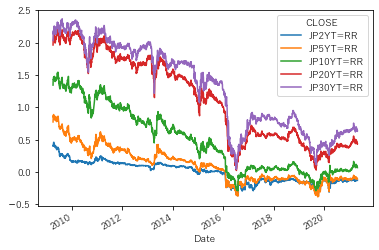

In [15]:
df.plot()

In [13]:
df = pd.concat([data_JP1,data_JP2,data_JP3,data_JP4,data_JP5,data_JP6,data_JP7],sort=False)

In [22]:
daily_change = df.diff()
daily_change.dropna(inplace=True)

In [132]:
hv250 = daily_change.rolling(250).std()*np.sqrt(250)
hv120 = daily_change.rolling(120).std()*np.sqrt(250)
hv60 = daily_change.rolling(60).std()*np.sqrt(250)
hv20 = daily_change.rolling(20).std()*np.sqrt(250)


In [133]:
hv250.to_excel(str(path)+'\hv250.xlsx')

In [130]:
hv20 = df.rolling(20).std()*np.sqrt(250)
hv20.to_excel(str(path)+'\hv20.xlsx')

In [119]:
# 日次リターンを求める
daily_pct_change =  df.pct_change()   # 日次リターンの計算
daily_pct_change.fillna(0, inplace=True)                # Nanを0で埋める




AttributeError: module 'pandas' has no attribute 'rolling_std'

In [120]:
# ヒストリカルボラティリティを求める
hv = pd.rolling_std(daily_pct_change, window=20, ddof=False) *  np.sqrt(250)
hv.plot()


AttributeError: module 'pandas' has no attribute 'rolling_std'

In [114]:
retun =np.log(df/df.shift(-1))
retun2 = retun.dropna()

In [117]:
retstd = retun2.std()

In [118]:
retstd

CLOSE
JP2YT=RR          NaN
JP5YT=RR     0.101805
JP10YT=RR         NaN
JP20YT=RR    0.052621
JP30YT=RR    0.043243
dtype: float64

In [82]:
np.std(retun)

nan

In [79]:
daily_std = np.std(retun)

In [80]:
daily_std

nan

In [ ]:
def Calc_historical_Vol(df:pd.DataFrame,shift,m=250):
    ret_list = {}
    for column_name, item in df.iteritems():
        ret_list[column_name] = np.log()

In [13]:
FFeurodollar = ek.get_data('0#ED:', fields='HST_CLOSE')

In [14]:
FFeurodollar[0]

,Instrument,HST_CLOSE
0,/EDM1,99.8625
1,/EDN1,99.8550
2,/EDQ1,99.8550
3,/EDU1,99.8550
4,/EDV1,99.8450
5,/EDX1,99.8300
6,/EDZ1,99.8100
7,/EDH2,99.8250
8,/EDM2,99.7850
9,/EDU2,99.7200


In [ ]:

data = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:13]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-1-01',  # start date
                         end_date='2020-05-11',
                         interval='weekly')  # end date

In [ ]:
data

In [ ]:
data.columns = range(len(data.columns))

In [ ]:
cols = [4,19,21,22]
F_CL_Curv_3=data.dropna(how='all').T.iloc[:,cols]

In [ ]:
GenS=data.T.iloc[['0','1','7','12']]
GenS.T

In [89]:
Sp_g=make_Spread(GenS.T,0)

In [9]:
 F_CL_Curv_3.columns=['2020/1/3','2020/4/17','2020/5/1','2020/5/8']

In [10]:
color={'2020/1/3':'black','2020/4/17':'#607D8B','2020/5/1':'#9E9E9E','2020/5/8':'#B0BEC5'}
width ={'2020/1/3':4,'2020/4/17':2,'2020/5/1':2,'2020/5/8':5}
dash={'2020/1/3':'solid','2020/4/17':'dot','2020/5/1':'dot','2020/5/8':'solid'}


In [14]:
F_CL_Curv_3.iplot(yTitle='USD/Bbl',xTitle=('期先月数'),
                    colors=color,
                    width=width,
                    dash=dash,
                    legend =dict(x=0.8,y=0)
                )

In [16]:
F_CL_Curv_3.iloc[:,1::2].iplot()

In [17]:
data2 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-11-01',  # start date
                         end_date='2020-05-11',
                         interval='monthly')  # end date

In [22]:
data4 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2019-12-15',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [22]:
rics =['CLc1']
data4 = ek.get_timeseries(list(FFcurve[0]['Instrument'].iloc[:24]),  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2019-12-15',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [24]:
CLc1_c2 = data4.dropna(how='any').iloc[:,:2]
CLc1_c2

CLOSE,CLM0,CLN0
Date,,
2019-12-16,58.56,58.08
2019-12-17,59.09,58.56
2019-12-18,59.18,58.63
2019-12-19,59.43,58.85
2019-12-20,59.07,58.54
...,...,...
2020-05-05,24.56,26.49
2020-05-06,23.99,25.62
2020-05-07,23.55,24.83


In [ ]:
Sp_g= make_Spread()

In [25]:
CLc1_c2.iplot()

In [137]:
data2.T.iplot()

In [38]:
data2.iloc[:,:5]

NameError: name 'data2' is not defined

In [122]:
col = range(1,len(data2.columns))
data2.columns = range(len(data2.columns))

In [70]:
def make_Spread(data,kijun_no):
    cols =[]
    df = pd.DataFrame(data.iloc[:,kijun_no])
    for lag in range(1, len(data.columns)):
        col = 'spread_{}'.format(lag)  # defines the column name
        df[col] = data.iloc[:,kijun_no]-data.iloc[:,kijun_no+lag]  # creates the lagged data column
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

In [96]:
Sp_G = Sp_g[0].iloc[:,1:]
Sp_G.columns=['1月先','6月先','12月先']
Sp_G.iplot(yTitle='USD/Bbl',
                            colors={'1月先':'black','6月先':'#607D8B','12月先':'#9E9E9E'},
                            width={'1月先':3,'6月先':1,'12月先':3},
                            dash={'1月先':'solid','6月先':'solid','12月先':'dot'},
                            fontsize=100,
                            legend =dict(x=0,y=1)
                            )

In [94]:
Spread = CLZ1['/CLM0'] - CLZ1['/CLZ1']

In [95]:
Spread

Date
2015-12-31    -1.43
2016-01-31    -1.46
2016-02-29    -1.47
2016-03-31    -1.40
2016-04-30    -1.36
2016-05-31    -1.80
2016-06-30    -1.20
2016-07-31    -1.55
2016-08-31    -1.41
2016-09-30    -1.60
2016-10-31    -1.28
2016-11-30    -1.25
2016-12-31    -0.28
2017-01-31    -0.36
2017-02-28    -0.40
2017-03-31    -1.08
2017-04-30    -1.22
2017-05-31    -1.42
2017-06-30    -1.95
2017-07-31    -1.60
2017-08-31    -1.42
2017-09-30    -0.18
2017-10-31     0.51
2017-11-30     1.16
2017-12-31     1.94
2018-01-31     2.56
2018-02-28     2.06
2018-03-31     3.21
2018-04-30     4.52
2018-05-31     3.69
2018-06-30     4.36
2018-07-31     3.83
2018-08-31     4.44
2018-09-30     5.28
2018-10-31     3.83
2018-11-30    -0.13
2018-12-31    -1.78
2019-01-31     1.11
2019-02-28     2.72
2019-03-31     3.42
2019-04-30     4.67
2019-05-31     1.49
2019-06-30     2.44
2019-07-31     3.71
2019-08-31     2.37
2019-09-30     1.80
2019-10-31     2.48
2019-11-30     3.43
2019-12-31     6.37
2020-01-31     

In [134]:
def make_Spread(data,kijun_no):
    cols =[]
    df = pd.DataFrame(data.iloc[:,kijun_no])
    for lag in range(1, len(data.columns)):
        col = 'spread_{}'.format(lag)  # defines the column name
        df[col] = data.iloc[:,kijun_no]-data.iloc[:,kijun_no+lag]  # creates the lagged data column
        cols.append(col)  # stores the column name
    df.dropna(inplace=True)  # gets rid of incomplete data rows
    return df, cols

In [135]:
Spread = make_Spread(data2,0)

In [152]:
rics =[
    'CLc1',
    'LCOc1',
    'OQc1'
]
OIL_d = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-12-01',  # start date
                         end_date='2020-05-11',
                         interval='daily')  # end date

In [150]:
OIL_m = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2015-12-01',  # start date
                         end_date='2020-05-11',
                         interval='monthly')  # end date

In [153]:
OIL_d.columns=['WTI','ICEブレント','ドバイ原油']
OIL_m.columns=['WTI','ICEブレント','ドバイ原油']


In [160]:
OIL_m.dropna(how='any').plot(yTitle='USD/Bbl')

AttributeError: 'Line2D' object has no property 'ytitle'

In [185]:
OIL_m.dropna(how='any').iplot(yTitle='USD/Bbl',
                            colors={'WTI':'black','ICEブレント':'#607D8B','ドバイ原油':'#9E9E9E'},
                            width={'WTI':3,'ICEブレント':1,'ドバイ原油':3},
                            dash={'WTI':'solid','ICEブレント':'solid','ドバイ原油':'dot'},
                            legend =dict(x=0,y=1)
                            )


In [204]:
OIL_d.dropna(how='any').iplot(yTitle='USD/Bbl',
                            colors={'WTI':'black','ICEブレント':'#607D8B','ドバイ原油':'#9E9E9E'},
                            width={'WTI':3,'ICEブレント':1,'ドバイ原油':3},
                            dash={'WTI':'solid','ICEブレント':'solid','ドバイ原油':'dot'},
                            legend =dict(x=0.01,y=0.01)
                            )

In [183]:
import plotly.graph_objects as go
fig = go.Figure()

In [184]:
fig.add_trace(go.iplot(OIL_d.dropna(how='any')))

AttributeError: module 'plotly.graph_objects' has no attribute 'iplot'

In [28]:
rics =[
    'CLc1',
    'CLc2'
]
OIL_Gensp = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2020-3-30',  # start date
                         end_date='2020-4-22',
                         interval='daily')  # end date

In [35]:
OIL_Gensp.columns =['4月限','5月限']
OIL_Gensp.iplot(yTitle='USD/Bbl',
                            colors={'4月限':'black','5月限':'gray'},
                            width={'4月限':2,'5月限':4},
                            dash={'4月限':'solid','5月限':'dot'},
                            legend =dict(x=0,y=0))

In [37]:
OIL_Gensp.iplot(yTitle='USD/Bbl',
                            colors={'4月限':'black','5月限':'gray'},
                            width={'4月限':2,'5月限':4},
                            dash={'4月限':'solid','5月限':'dot'},
                            legend =dict(x=0,y=0),
                            subplots=True,shape=(2,1),shared_xaxes=True)

In [112]:
rics=['C-STKOKL-2-EIA','C-STK-T-EIA','CLc1']

In [113]:
Cussing = ek.get_timeseries(rics,  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2004-01-01',  # start date
                         end_date='2020-05-18',
                         interval='monthly')  # end date

In [114]:
Cussing.to_excel('C://Users//KOSUKE//Desktop//upload//WTI//cus2.xlsx')

In [109]:
layout.yaxis

NameError: name 'layout' is not defined

In [23]:
Path = os.getcwd()

In [24]:
cpi = pd.read_excel(Path+'\\cpi.xlsx',sheet_name = 'cpi',header =3,date_parser=1,index_col=0)


In [26]:
cpi.dropna(how='any',inplace = True)
col_all=['All items','Food','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
]


In [57]:
cpi[col_lessFFood].iplot()

In [25]:
col_lessFFood=['All items, less fresh food','Food, less fresh food ','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
]
cpi_lessFFood = cpi[col_lessFFood]

In [20]:
weight = pd.read_excel(Path+'\\cpi.xlsx',sheet_name = 'weight',header =3,index_col=0)

In [33]:
weight.dropna(how='any',inplace = True)
weight_lessFFood=weight[col_lessFFood]

In [34]:
weight_lessFFood

,All items,"All items, less fresh food","Food, less fresh food",Housing,"Fuel, light & water charges",Furniture & household utensils,Transpor- tation & communi- cation,Recre- ational durable goods,Medical care,Transpor- tation & communi- cation,Culture & recreation,Miscella- neous,Energy,Expenses for education,Expenses for culture & recreation,Expenses for information & communi-cation
ウエイト\n(平成27年指数以降),10000,9586,2209,2087,745,348,1476,59,430,1476,989,574,784,400,1085,476
品目数\n(平成27年指数以降),585,523,173,20,6,48,43,11,29,43,79,44,5,27,82,7


In [37]:
weight_lessFFood.iloc[0,2:].sum()

13138

In [ ]:
col_all=['All items','Food','Housing','Fuel, light & water charges','Furniture & household utensils','Transpor- tation & communi- cation','Recre- ational durable goods',
'Medical care',
'Transpor- tation & communi- cation',
'Culture & recreation',
'Miscella- neous',
'Energy','Expenses for education','Expenses for culture & recreation','Expenses for information & communi-cation'
]

In [31]:
cpi_ene = cpi['Energy']
type(cpi_ene)

pandas.core.series.Series

In [52]:
data2 = ek.get_timeseries(['CLc1','JPY='],  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='1990-11-01',  # start date
                         end_date='2020-05-11',
                         interval='weekly')  # end date

In [55]:
data2.head()

CLOSE,CLc1,JPY=
Date,,
1991-08-16,21.30,137.35
1991-08-23,21.81,136.85
1991-08-30,22.26,136.78
1991-09-06,21.57,135.55
1991-09-13,21.68,134.00


In [54]:
data2_M = data2.resample('M').mean()

CLOSE,CLc1,JPY=
Date,,
1991-08-31,21.7900,136.993333
1991-09-30,21.8850,134.205000
1991-10-31,23.2400,130.117500
1991-11-30,22.4620,129.744000
1991-12-31,19.3425,127.565000
...,...,...
2020-01-31,57.2760,109.066000
2020-02-29,50.1275,109.775000
2020-03-31,29.2375,107.975000


In [38]:
data_d = ek.get_timeseries(['CLc1','JPY='],  # the RICs
                         fields='CLOSE',  # the required fields
                         start_date='2020-04-01',  # start date
                         end_date='2020-04-30',
                         interval='daily')  # end 

In [39]:
data_d.describe()

CLOSE,CLc1,JPY=
count,21.000000,22.000000
mean,16.699048,107.778636
std,13.378192,0.657914
min,-37.630000,106.700000
25%,15.060000,107.282500
50%,19.870000,107.665000
75%,22.760000,108.322500
max,28.340000,109.200000


In [41]:
data_d.resample('m').mean()

CLOSE,CLc1,JPY=
Date,,
2020-04-30,16.699048,107.778636
